In [4]:
from spec_id import Likelihood_contours,Median_w_Error,Highest_likelihood_model_JWST,Scale_model
from scipy.interpolate import interp1d
from scipy.ndimage import filters
from matplotlib import gridspec
from astropy.io import ascii
from astropy.table import Table
from glob import glob
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
sea.set(style='white')
sea.set(style='ticks')
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direction': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [12]:
P = np.load('../mcerr/sim_fit_s39170.npy').T
Pnc = np.load('../mcerr/sim_fit_s39170_NC.npy').T
Z,PZ = np.load('../mcerr/sim_fit_s39170_Z.npy')
Z,PZnc = np.load('../mcerr/sim_fit_s39170_ncZ.npy')
t,Pt = np.load('../mcerr/sim_fit_s39170_t.npy')
t,Ptnc = np.load('../mcerr/sim_fit_s39170_nct.npy')
onesig,twosig = Likelihood_contours(age,metal,P)
onesignc,twosignc = Likelihood_contours(age,metal,Pnc)
levels = np.array([twosig,onesig])
levelsnc = np.array([twosignc,onesignc])

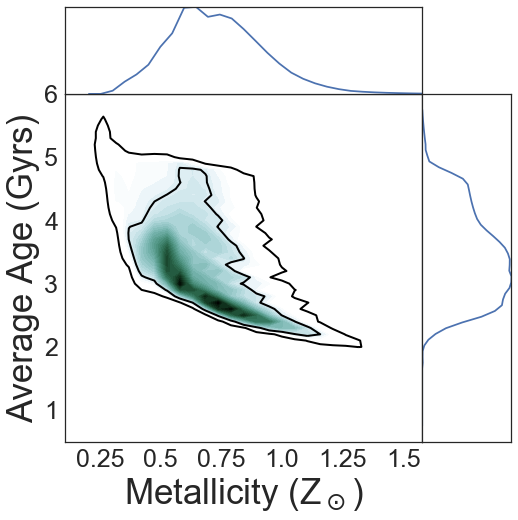

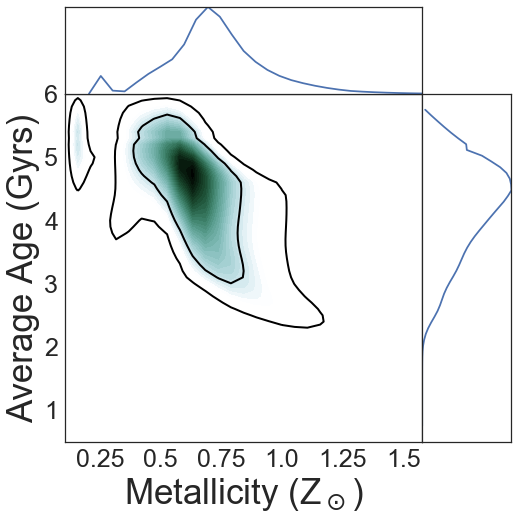

In [14]:
%matplotlib inline

gs = gridspec.GridSpec(2,2,height_ratios=[1,4],width_ratios=[4,1],hspace=0,wspace=0)
plt.figure(figsize=[8,8])
plt.subplot(gs[2])
plt.contour(M,A,P,levels,colors='k',linewidths=2)
plt.contourf(M,A,P,40,cmap=cmap)
plt.xlabel('Metallicity (Z$_\odot$)',size=35)
plt.ylabel('Average Age (Gyrs)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])
plt.subplot(gs[0])
plt.plot(Z,PZ)
plt.xticks([])
plt.yticks([])
plt.xlim(0,0.03)
plt.ylim(0,max(PZ))
plt.subplot(gs[3])
plt.plot(Pt,t)
plt.xticks([])
plt.yticks([])
plt.xlim(0,max(Pt))
plt.show()
plt.close()

gs = gridspec.GridSpec(2,2,height_ratios=[1,4],width_ratios=[4,1],hspace=0,wspace=0)
plt.figure(figsize=[8,8])
plt.subplot(gs[2])
plt.contour(M,A,Pnc,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pnc,40,cmap=cmap)
plt.xlabel('Metallicity (Z$_\odot$)',size=35)
plt.ylabel('Average Age (Gyrs)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])
plt.subplot(gs[0])
plt.plot(Z,PZnc)
plt.xticks([])
plt.yticks([])
plt.xlim(0,0.03)
plt.ylim(0,max(PZnc))
plt.subplot(gs[3])
plt.plot(Ptnc,t)
plt.xticks([])
plt.yticks([])
plt.xlim(0,max(Ptnc))
plt.show()
plt.close()

In [9]:
Pt

array([ 1.3006817e-768,  4.3054544e-570,  1.2763133e-392,  1.4866402e-277,
        6.8148918e-223,  5.7737671e-172,  1.4714077e-117,  1.2650373e-70,
        1.1319427e-35,  1.2617111e-08,  1.5696342e-05,  0.0027563205,
        0.0018428242,  0.0021555311,  0.011216156,  0.032831552,
        0.070422173,  0.12537752,  0.21127122,  0.31338266,  0.38435098,
        0.42158251,  0.42718514,  0.43859881,  0.46143778,  0.47103965,
        0.47203812,  0.46030304,  0.46247519,  0.46298376,  0.45331084,
        0.43707978,  0.4090641,  0.37599028,  0.34076847,  0.30975931,
        0.29036916,  0.2785062,  0.26898111,  0.26081088,  0.25388732,
        0.24764845,  0.24099655,  0.21507657,  0.15550186,  0.087991863,
        0.037704038,  0.02741411,  0.018360273,  0.017705213,  0.013954097,
        0.010596066,  0.0075466898,  0.0048407574,  0.0025158471,
        0.00070702751], dtype=float128)